In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import joblib

In [4]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
def clean_data(df):
    results = re.sub('<.*?>', '', df)
    return results

In [7]:
data['review'] = data['review'].apply(lambda x: x.lower())
data['review'] = data['review'].apply(lambda x: clean_data(x))

In [8]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [9]:
X = data['review']
y = data['sentiment']

In [16]:
# Using hashvectorizer to keep the model size small
cv = HashingVectorizer(stop_words = 'english', ngram_range=(1,2))
cv.fit(X)
X_fitted = cv.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_fitted, y, test_size = 0.25, random_state = 31)

# Linear SVM powered by SGD Classifier
clf = SGDClassifier(loss ='hinge', tol = None, max_iter=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      6277
    positive       0.88      0.90      0.89      6223

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



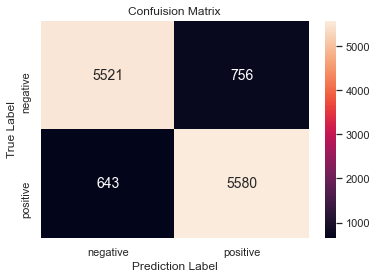

In [19]:
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# plot
ax = plt.subplot()
sns.set(font_scale=1)
sns.heatmap(df_cm, ax = ax, annot=True, annot_kws={'size':14}, fmt='g')

# title and label
ax.set_xlabel('Prediction Label')
ax.set_ylabel('True Label')
ax.set_title('Confuision Matrix')
ax.xaxis.set_ticklabels(['negative', 'positive'])
ax.yaxis.set_ticklabels(['negative', 'positive'])
plt.show()

In [20]:
# saving the model
joblib.dump(cv, 'input_transformer.pkl')
joblib.dump(cv, 'review_sentiment.pkl')

['review_sentiment.pkl']